<a href="https://colab.research.google.com/github/nkr1108/myAIML/blob/main/project_7_bank_churn_prediction_neural_network_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Background and Context**

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

**Objective**

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Data Dictionary**

* CustomerId: Unique ID which is assigned to each customer
* Surname: Last name of the customer 
* CreditScore: It defines the credit history of the customer.  
* Geography: A customer’s location    
* Gender: It defines the Gender of the customer   
* Age: Age of the customer     
* Tenure: Number of years for which the customer has been with the bank
* NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
* Balance: Account balance
* HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
* EstimatedSalary: Estimated salary 
* isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
* Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
0=No ( Customer did not leave the bank )
1=Yes ( Customer left the bank )

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import roc_curve
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading the Data**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gl_neural_network/Churn.csv')
#data = pd.read_csv('Churn.csv')

In [ ]:
# Checking the number of rows and columns in the data
data.shape

(10000, 14)

* The dataset has 10000 rows and 14 columns

**Data Overview**

In [ ]:
# view first 5 rows
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# view last 5 rows
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


* RowNumber can be deleted since its sequence number

In [ ]:
# datatypes of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are 10000 observations and 14 columns
* 3 columns are object type, remaining are integer

In [ ]:
# Let's check for duplicate values in the data
data.duplicated().sum()

0

* There are no duplicates

In [ ]:
# Let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

* There are no missing Values

In [ ]:
data["Exited"].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

* Target Variable is imbalanced. 20% customers left in less than 6 months

In [ ]:
# Let's check the number of unique values in each column
data.nunique(dropna=False)

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

* Each value of the column 'RowNumber' and 'CustomerId' is a unique identifier for customer. Hence we can drop this column as it will not add any predictive power or value to the model.

In [ ]:
# dropping RowNumber which is sequence number
data.drop(columns="RowNumber", inplace=True)

In [ ]:
# dropping CustomerId since it is not going to help in EDA or in our model
data.drop(columns="CustomerId", inplace=True)

In [ ]:
# statistical overview
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


**Observations**
* **CreditScore** - Mean is 650.1 and median is 652, both Mean and Median are pretty close. Min Score is 350 and max score is 850
* **Age** - Mean Age is 38.9 and Median age is 37. Min age is 18 and Max age is 92
* **Tenure** - Mean and Median Tenure are both 5. Min Tenure is zero and max is 10 years
* **Balance** - Mean Balance is 76K and Median is 97K. Min is zero and max is 251K. Data is left skewed
* **EstimatedSalary** - Mean and Median are very similar at 100K approx. Min salary is 11.58 and max is 199K

In [ ]:
cat_cols = ['Surname','Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']

for i in cat_cols:
    print("Unique values in", i, "are :")
    print(data[i].value_counts(1))
    print("*" * 50)

Unique values in Surname are :
Smith       0.0032
Scott       0.0029
Martin      0.0029
Walker      0.0028
Brown       0.0026
             ...  
Izmailov    0.0001
Bold        0.0001
Bonham      0.0001
Poninski    0.0001
Burbidge    0.0001
Name: Surname, Length: 2932, dtype: float64
**************************************************
Unique values in Geography are :
France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64
**************************************************
Unique values in Gender are :
Male      0.5457
Female    0.4543
Name: Gender, dtype: float64
**************************************************
Unique values in NumOfProducts are :
1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: NumOfProducts, dtype: float64
**************************************************
Unique values in HasCrCard are :
1    0.7055
0    0.2945
Name: HasCrCard, dtype: float64
**************************************************
Unique values in IsActiveMember are :
1

**Observations**
* **Surname** - Earlier we have seen Surname has 2932 unique values, we cannot possibly keep this variable for neural network model and we will drop it later. Top 5 surnames are Smita, Martin, Scott, Walker and Brown
* **Geography** - Geography has 3 unique values with France being highest 50%
* **Gender** - 54.6% are male and 45.4% are female
* **NumOfProducts** - Almost 50% of customers have purchased 1 product and 46% have purchased 2 products
* **HasCrCard** - Almost 71% have credit card
* **IsActiveMember** - 51.5% customers are active member

## EDA

### Univariate Analysis

In [ ]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(8,5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Credit Score**

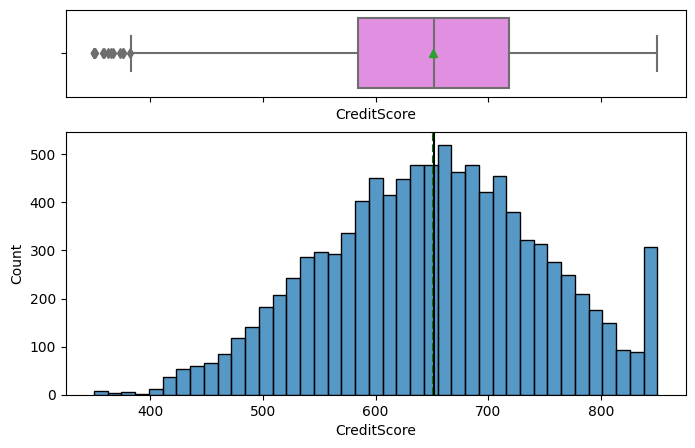

In [ ]:
histogram_boxplot(data, "CreditScore")

**Observation**
* IQR is between 600 and 725 approx
* Mean and Median are close to each other
* There are few outlier on the lower side
* There are approx 300 customers with perfect credit score

**Age**

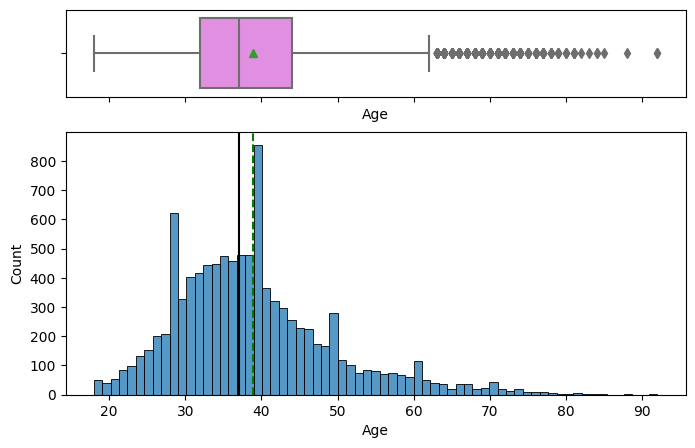

In [ ]:
histogram_boxplot(data, "Age")

**Observation**
* Age IQR is between 33 and 45 approx
* Age is right skewed
* There are quite a few outliers having higher age

**Tenure**

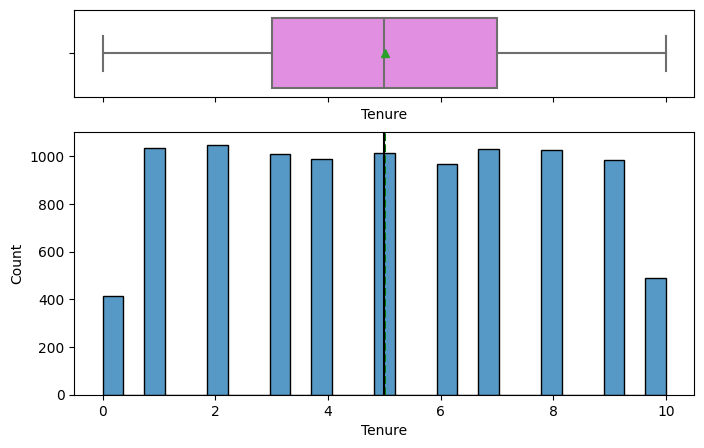

In [ ]:
histogram_boxplot(data, "Tenure")

**Observation**
* Data is evenly distributed between 1 and 9 years, though there are few customers at zero and 10 years as well

**Balance**

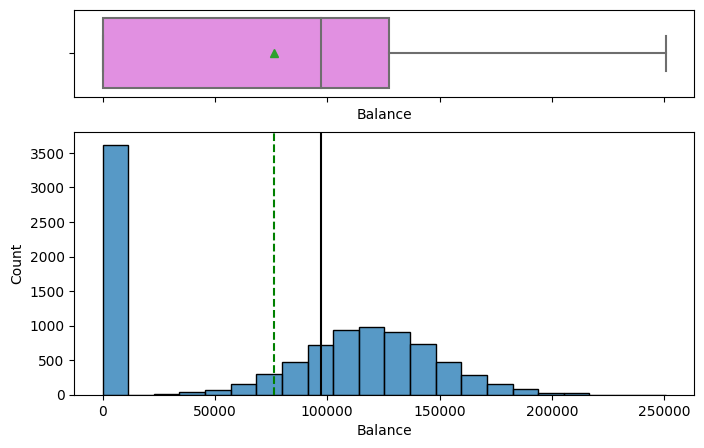

In [ ]:
histogram_boxplot(data, "Balance")

**Observation**
* There are many customers (close to 35%) with zero account balance

**EstimatedSalary**

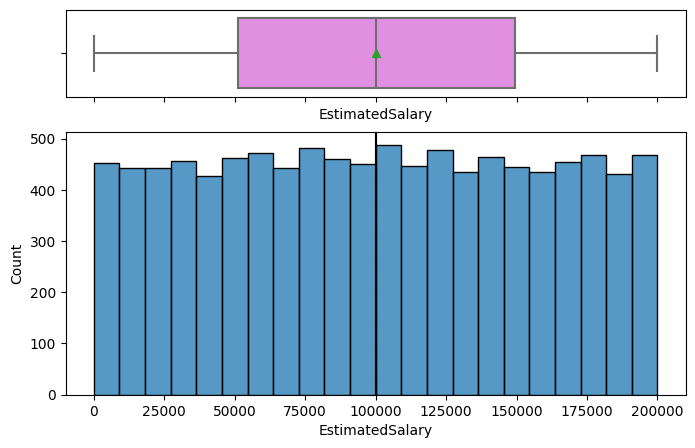

In [ ]:
histogram_boxplot(data, "EstimatedSalary")

**Observation**
* Estimated salary is evenly distributed between zero and 200K

In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 4))
    else:
        plt.figure(figsize=(n + 1, 4))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Geography**

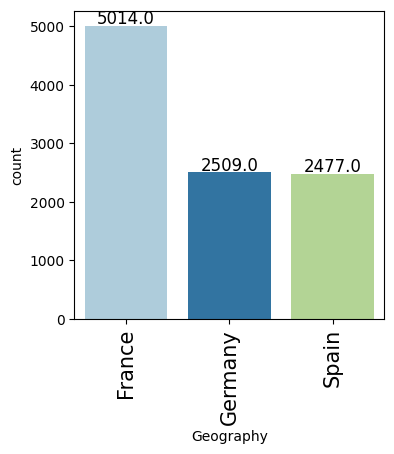

In [ ]:
labeled_barplot(data, "Geography")

**Observations**
* Half of the customers are from France and remaining half are almost evenly divided between Germany and Spain

**Gender**

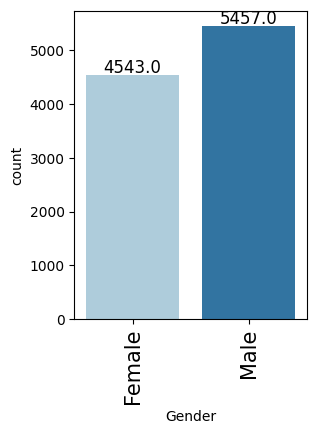

In [ ]:
labeled_barplot(data, "Gender")

**Observations**
* Bank has more Male customers than Female

**NumOfProducts**

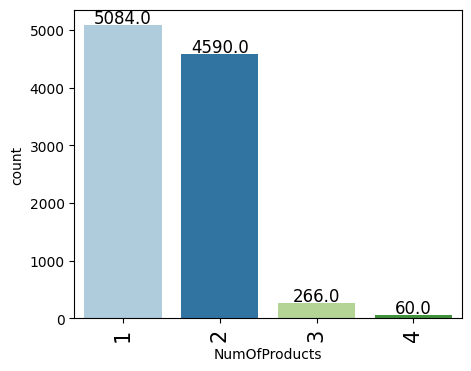

In [ ]:
labeled_barplot(data, "NumOfProducts")

**Observations**
* Most of the customers have purchased just one product from the bank, followed by 2 products. 
* There are hardly any customers who have 3 or 4 products

**HasCrCard**

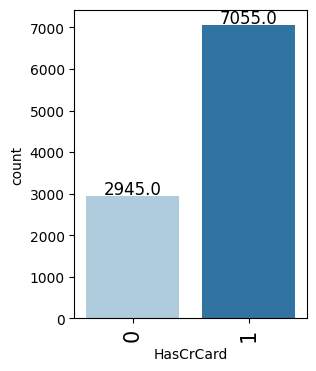

In [ ]:
labeled_barplot(data, "HasCrCard")

**Observations**
* Majority of the customers (close to 70%) have credit card with bank

**IsActiveMember**

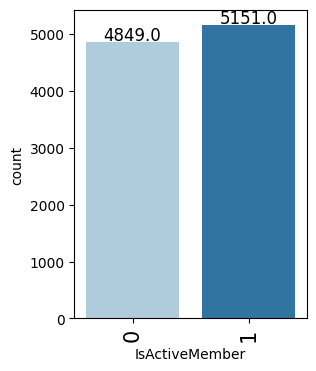

In [ ]:
labeled_barplot(data, "IsActiveMember")

**Observations**
* Almost half of the bank's customers are active members

**Exited**

0    7963
1    2037
Name: Exited, dtype: int64


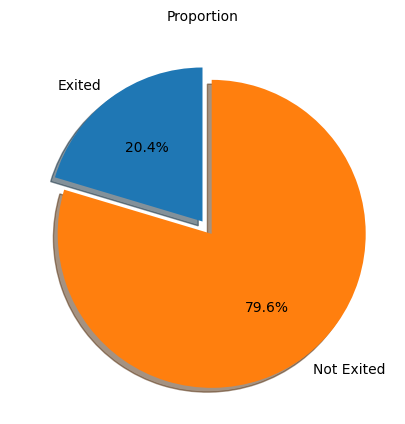

In [ ]:
print(data.Exited.value_counts())
labels = 'Exited', 'Not Exited'
sizes = [data.Exited[data['Exited']==1].count(),data.Exited[data['Exited']==0].count()]
plt.figure(figsize=(7,5))
plt.pie(sizes, labels=labels,explode=[0,0.1], autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Proportion", size = 10)
plt.show()

* 20% customers exited the bank

### Bivariate Analysis

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(8, 6))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

**CreditScore vs Exited**

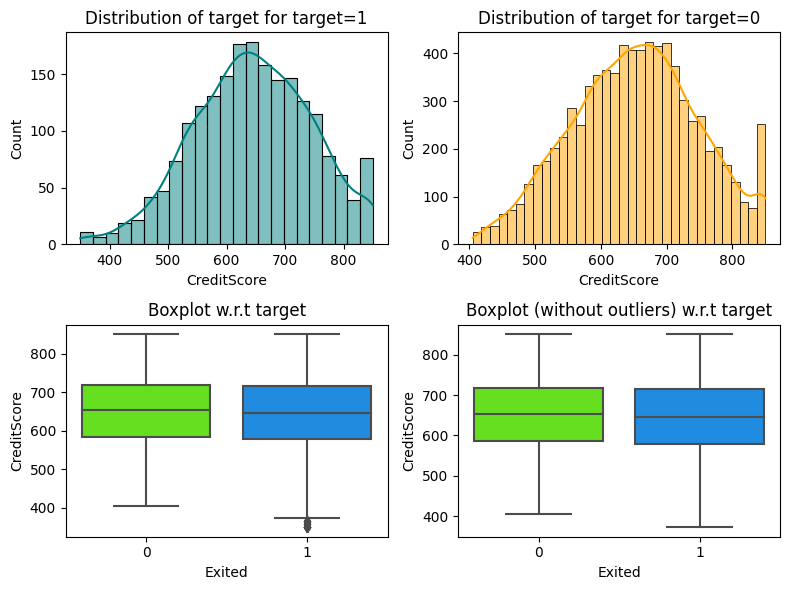

In [ ]:
distribution_plot_wrt_target(data, "CreditScore", "Exited")

* Customers who exited and who did not exit following similar credit score distribution

**Age vs Exited**

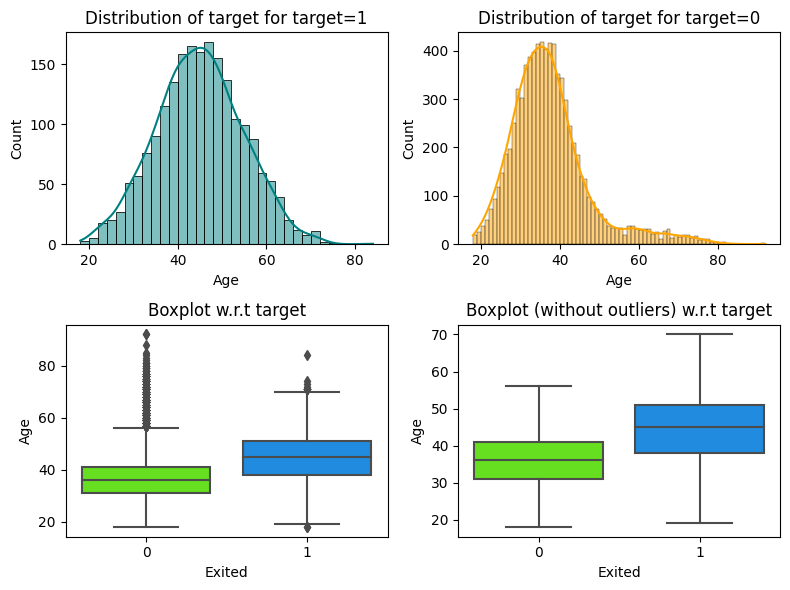

In [ ]:
distribution_plot_wrt_target(data, "Age", "Exited")

* Customer's Age who exited follow normal distribution but customer's age who did not exit has right skewed data
* Customers who are having higher age, are more likely to exit

**Tenure vs Exited**

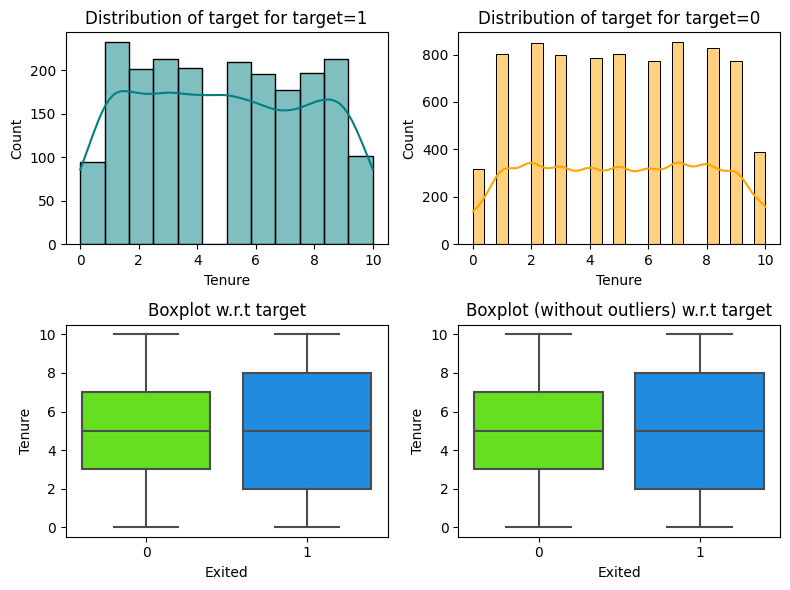

In [ ]:
distribution_plot_wrt_target(data, "Tenure", "Exited")

* Interquartile Range (spread of middle half) of Tenure is between 3 and 7 years for customers who are with bank, but for customers who left, interquartile range is more spread, between 2 and 8 years

**Balance vs Exited**

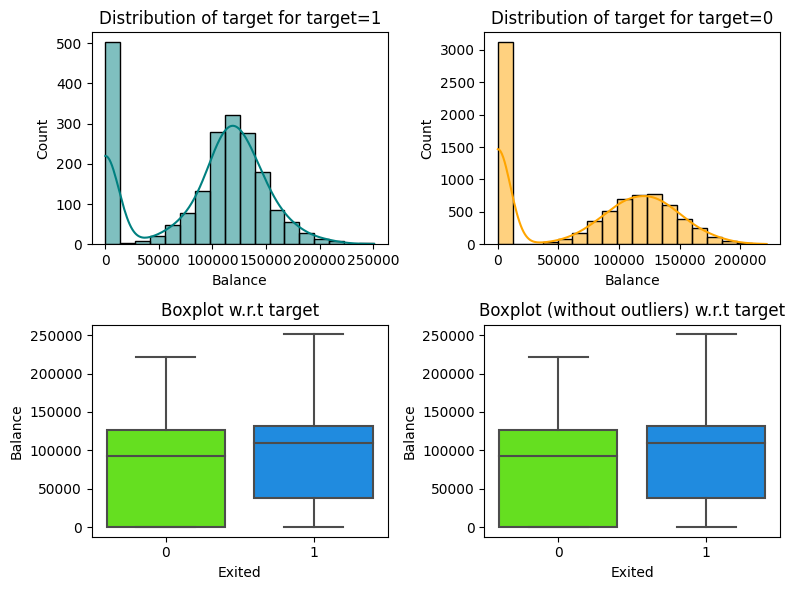

In [ ]:
distribution_plot_wrt_target(data, "Balance", "Exited")

* Both type of customers who stayed and who exited show similar pattern in terms of Balance

**EstimatedSalary vs Exited**

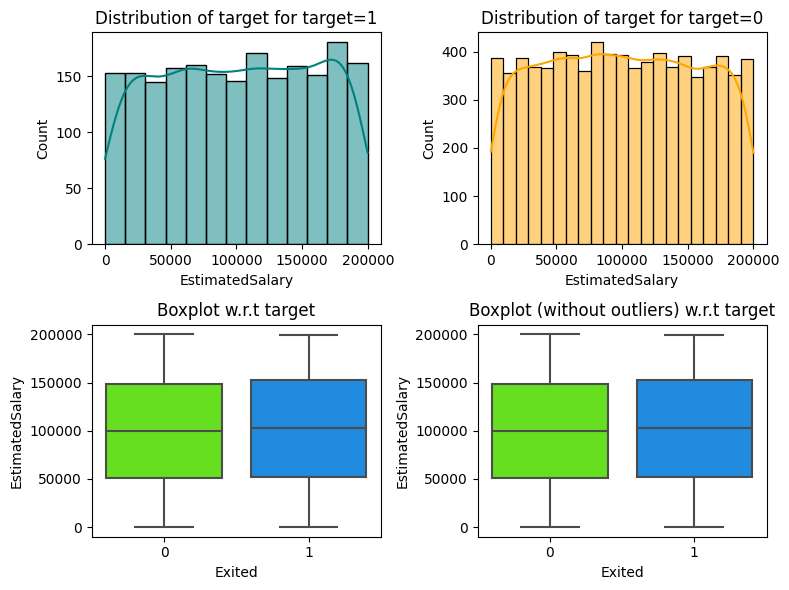

In [ ]:
distribution_plot_wrt_target(data, "EstimatedSalary", "Exited")

* Estimated Salary range show similar distribution and pattern for both type of customers (exited and not exited)

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Geography vs Exited**

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


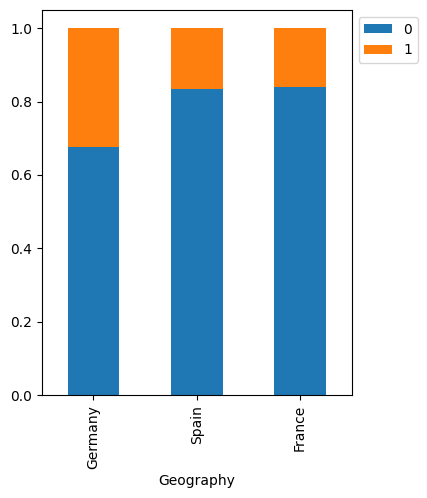

In [ ]:
stacked_barplot(data, "Geography", "Exited")

* Customers from Germany are more likely to exit, compared to customers from Spain and France 

**Gender vs Exited**

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


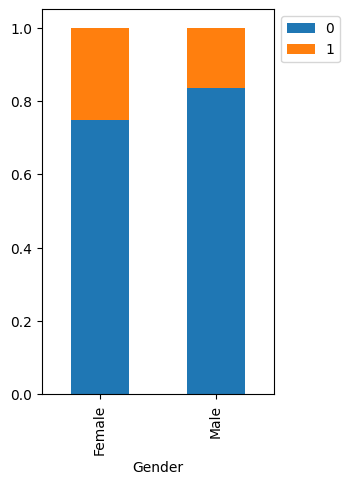

In [ ]:
stacked_barplot(data, "Gender", "Exited")

* According the given data, females are more likely to leave bank

**Number of Products vs Exited**

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


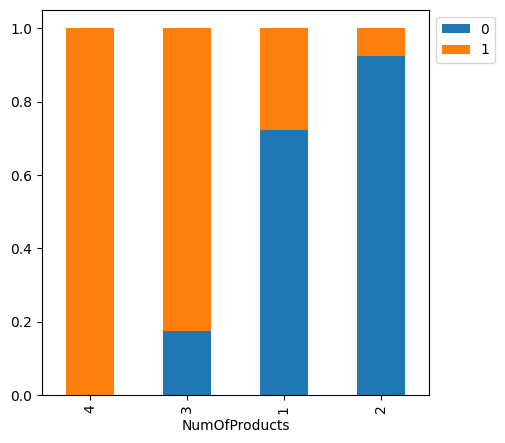

In [ ]:
stacked_barplot(data, "NumOfProducts", "Exited")

* As we have seen preiously, almost 51% of customers have purchased 1 product and 46% have purchased 2 products. Customers who have just 1 product are more likely to leave the bank

**Has Credit Card vs Exited**

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


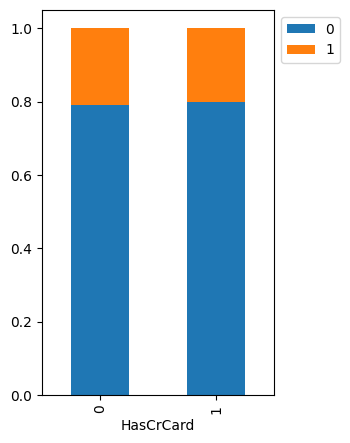

In [ ]:
stacked_barplot(data, "HasCrCard", "Exited")

* Looks like, customers who do not have credit card are slightly more likely to leave bank

**IsActiveMember vs Exited**

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


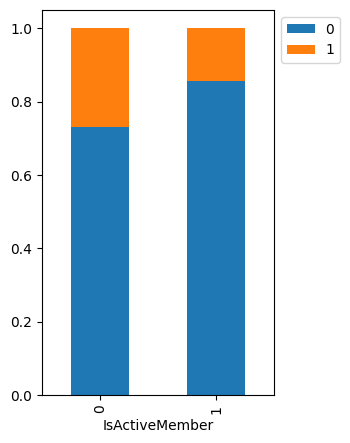

In [ ]:
stacked_barplot(data, "IsActiveMember", "Exited")

* Customers who are not so much active are more likely to leave the bank

**Age vs CreditScore vs Exited**

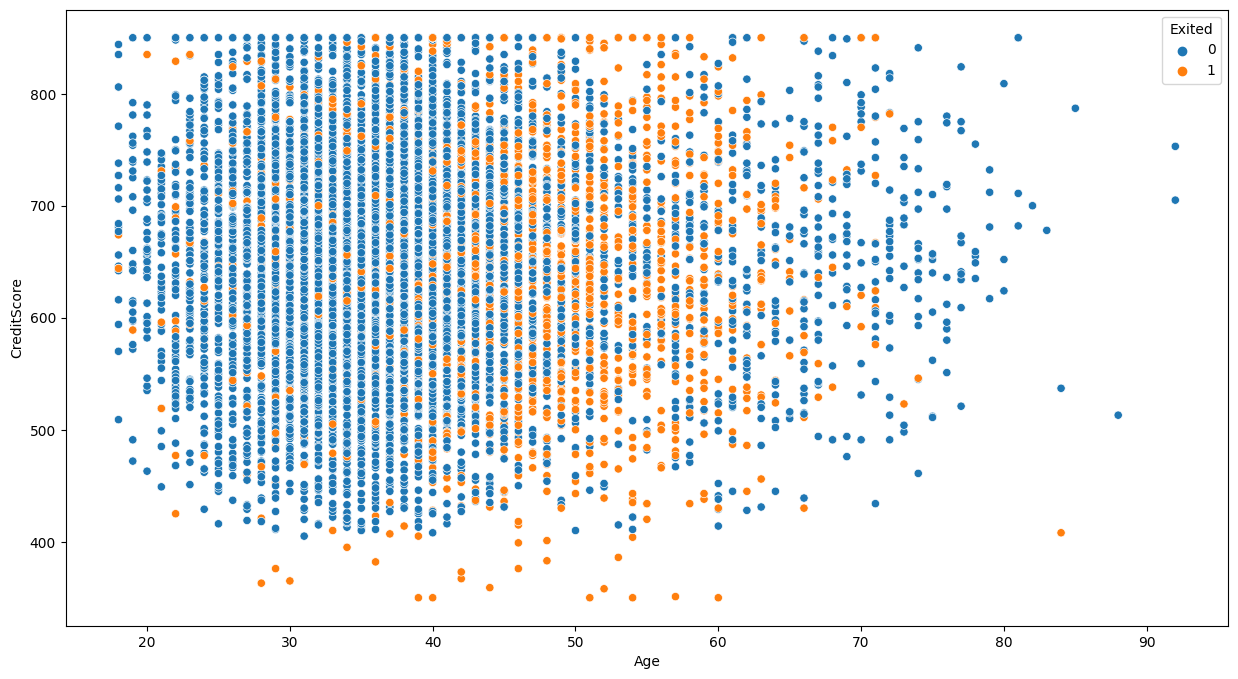

In [ ]:
plt.figure(figsize=(15,8))

sns.scatterplot(data=data, 
           x='Age', 
           y='CreditScore', 
           hue='Exited',
               );

* As previously seen, Customers with higher age are more likely to exit the bank
* Also, customers who have less than 400 credit score are likely to exit irrespective of the age
* There is no specific trend between CreditScore and Age

**Geography vs Balance vs Exited**

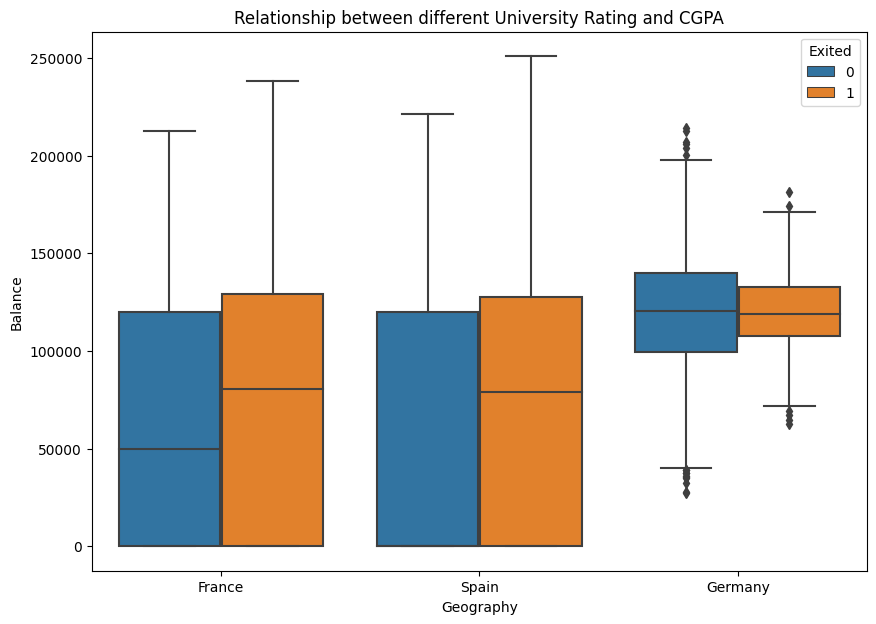

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data,
             x='Geography', 
             y='Balance',
             hue='Exited')
plt.title('Relationship between different University Rating and CGPA')
plt.show()

* IQR for Balance shows customers from Germany is between approx 110K and 135K

**Relationship between different features**

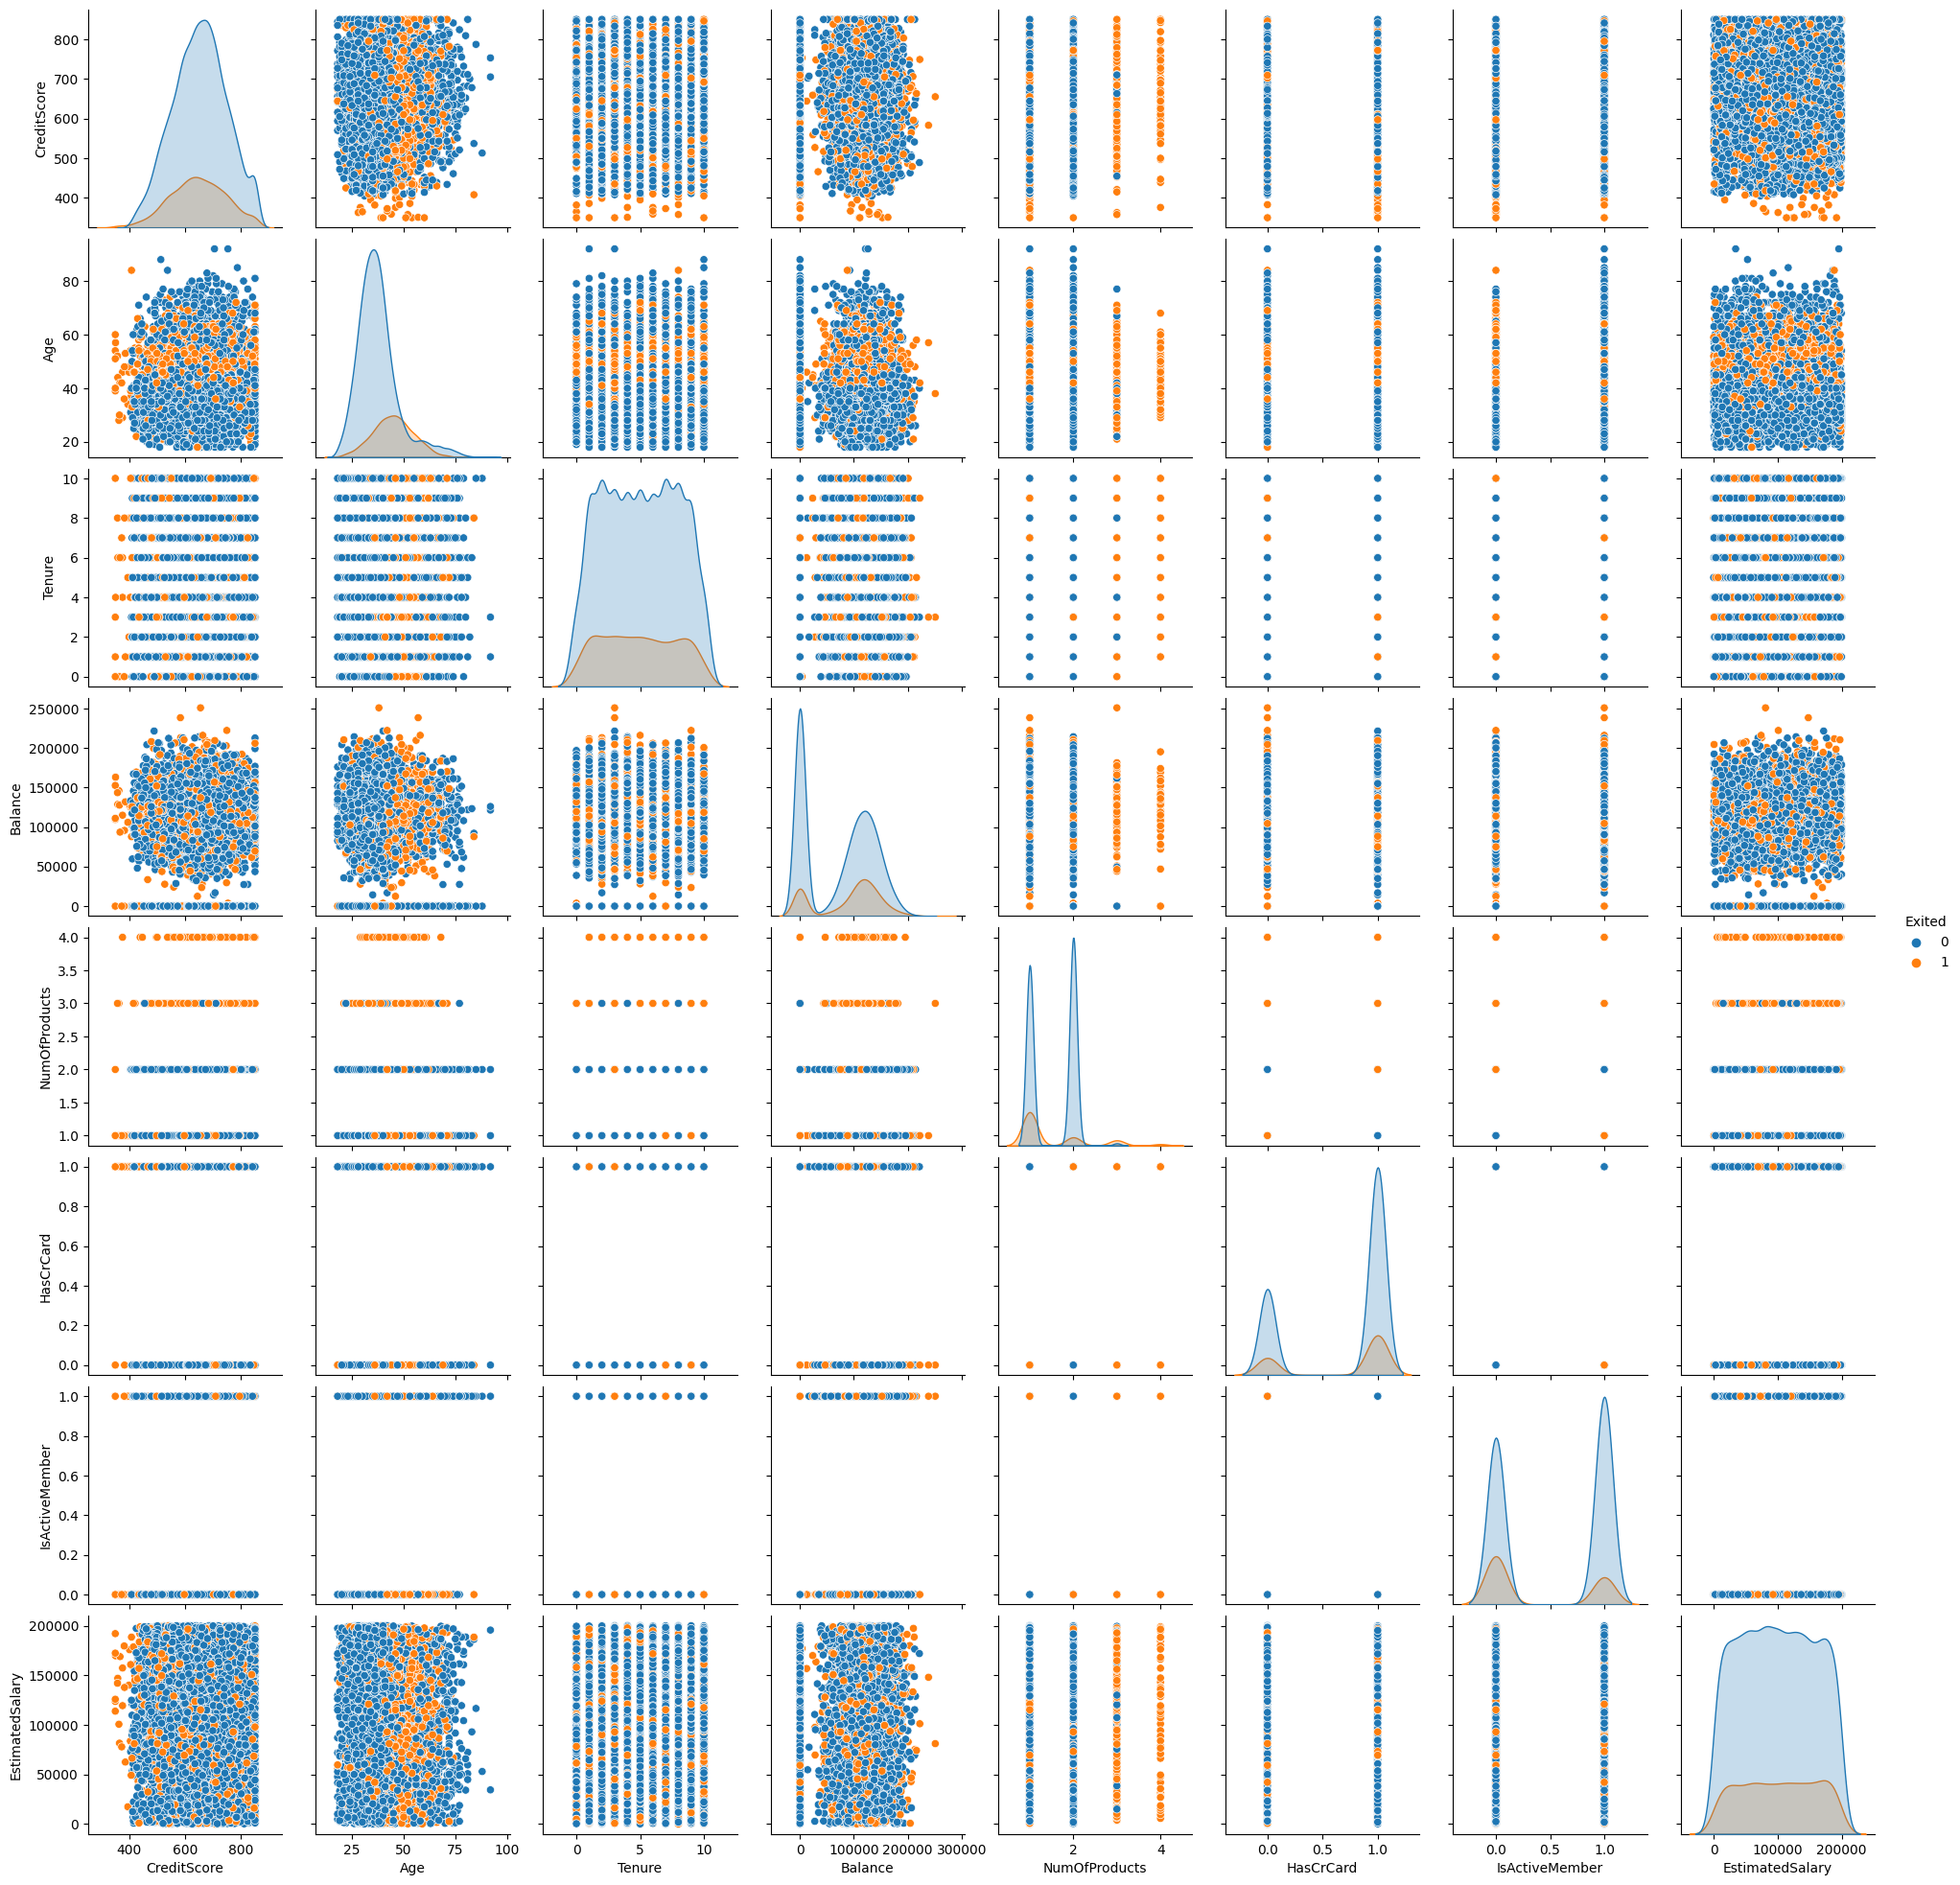

In [ ]:
sns.pairplot(data=data,hue='Exited',diag_kind='kde');

**Observations from EDA**
* Different features provided does not show any correlation between themselves
* Bank’s customers Age IQR is between 33 and 45 approx, and their credit score IQR is between 600 and 725 appro. There are almost 35% customers who have zero Balance. 
* Almost 50% of customers are from France and remaining half from Germany and Spain. Bank has more Male (55%) customers than Female (45%)
* Almost 51% customers use just 1 product and 46% use 2 products and 71% customers have credit card
* Almost 51.5% customers are active. 
* Customers with less than 400 credit score are more likely to exit the bank
* Females are more likely to leave the bank and Customers from Germany are more likely to leave the bank

### Data Pre-processing

In [ ]:
# dropping Surname as it will not add any value to the model
data.drop(columns="Surname", inplace=True)

In [ ]:
# split the data into features and target
X = data.drop(['Exited'], axis=1)
y = data['Exited']

In [ ]:
# distribution of target variable before split
y.value_counts(1)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [ ]:
# splitting the data into train and test
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [ ]:
X_train.shape

(7000, 10)

In [ ]:
# checking distribution of target variable after split
print(y_train.value_counts(1))
print(y_test.value_counts(1))

0    0.796286
1    0.203714
Name: Exited, dtype: float64
0    0.796333
1    0.203667
Name: Exited, dtype: float64


In [ ]:
# scaling numerical variable - StandardScaler
scale = StandardScaler()
X_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] = scale.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] = scale.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [ ]:
# one hot encoding of categorical variable

X_train = pd.get_dummies(data=X_train, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7000, 11)
(3000, 11)


### Model Evaluation Criteria

**Model can make wrong prediction as**
* Predicting a customer is leaving but actually customer is not leaving - False Positive
* Predicting a customer is not leaving but actually customer is leaving - False Negative

**Which case is more important**
* Predicting a customer is not leaving but actually customer is leaving - False Negative. 

**We should try to reduce False Negative. OR increase Recall**

### Model Building

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)

**Model 1**
* 3 Hidden Layer, Activation - relu
* Optimizer - SGD
* loss = binary_crossentropy
* epochs - 100
* batch_size - 32

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
model1 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model1.add(Dense(128,activation = 'relu', input_dim = 11))
#Add hidden layers
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
# We use the sigmoid because we want probability outcomes
model1.add(Dense(1, activation = 'sigmoid')) 

In [ ]:
# Create optimizer with default learning rate
# Compile the model
model1.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,905
Trainable params: 11,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1=model1.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=100,
          batch_size=32,verbose=1)

Epoch 1/100
175/175 [==============================] - 1s 4ms/step - loss: 0.5686 - accuracy: 0.7379 - val_loss: 0.4967 - val_accuracy: 0.7921
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7973 - val_loss: 0.4766 - val_accuracy: 0.7921
Epoch 3/100
175/175 [==============================] - 0s 3ms/step - loss: 0.4597 - accuracy: 0.7973 - val_loss: 0.4611 - val_accuracy: 0.7921
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.7984 - val_loss: 0.4493 - val_accuracy: 0.7971
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4381 - accuracy: 0.8027 - val_loss: 0.4419 - val_accuracy: 0.8079
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.8093 - val_loss: 0.4367 - val_accuracy: 0.8100
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.8116 - val_loss: 0.4332 - val_accuracy: 0.8136

94/94 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.8567


[0.35081517696380615, 0.8566666841506958]

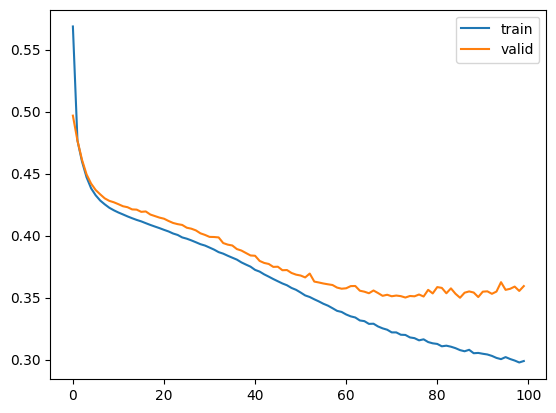

In [ ]:
# Capturing learning history per epoch
hist1  = pd.DataFrame(history1.history)
hist1['epoch'] = history1.epoch

# Plotting accuracy at different epochs
plt.plot(hist1['loss'])
plt.plot(hist1['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model1.evaluate(X_test, y_test)
results

94/94 [==============================] - 0s 2ms/step
Best Threshold=0.313629, G-Mean=0.778


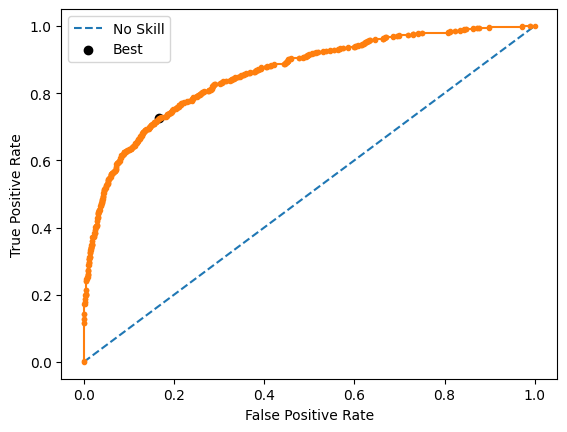

In [ ]:
# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr1, tpr1, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr1 * (1-fpr1))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr1, tpr1, marker='.')
plt.scatter(fpr1[ix], tpr1[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_pred1=model1.predict(X_test)
y_pred1 = (y_pred1 > thresholds1[ix])
y_pred1

94/94 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

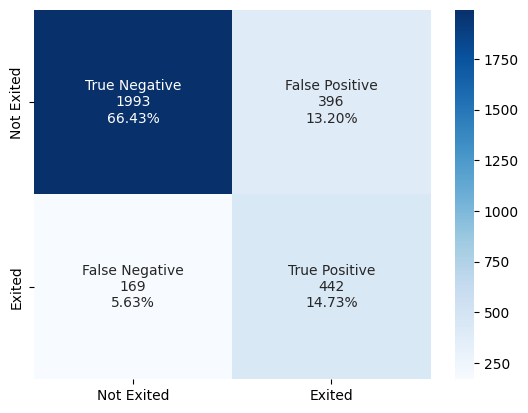

In [ ]:
#Calculating the confusion matrix 
cm1=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Not Exited','Exited']
make_confusion_matrix(cm1, 
                     group_names=labels,
                     categories=categories, 
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report 
cr1=classification_report(y_test,y_pred1)
print(cr1)

              precision    recall  f1-score   support

           0       0.92      0.83      0.88      2389
           1       0.53      0.72      0.61       611

    accuracy                           0.81      3000
   macro avg       0.72      0.78      0.74      3000
weighted avg       0.84      0.81      0.82      3000



**Model 2**
* 4 Hidden Layer, Activation - relu
* Adding Dropout
* Optimizer - Adam
* loss = binary_crossentropy
* epochs - 100
* batch_size - 32

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
model2 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model2.add(Dense(128,activation = 'relu', input_dim = 11))
model2.add(Dropout(.3))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(.3))
model2.add(Dense(32, activation='relu'))
# We use the sigmoid because we want probability outcomes
model2.add(Dense(1, activation = 'sigmoid')) 

In [ ]:
# Create optimizer with default learning rate
# Compile the model
model2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,905
Trainable params: 11,905
Non-traina

In [ ]:
history2=model2.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=100,
          batch_size=32,verbose=1)

Epoch 1/100
175/175 [==============================] - 2s 4ms/step - loss: 0.4813 - accuracy: 0.7825 - val_loss: 0.4342 - val_accuracy: 0.8100
Epoch 2/100
175/175 [==============================] - 1s 3ms/step - loss: 0.4420 - accuracy: 0.8120 - val_loss: 0.4223 - val_accuracy: 0.8171
Epoch 3/100
175/175 [==============================] - 1s 3ms/step - loss: 0.4314 - accuracy: 0.8143 - val_loss: 0.4105 - val_accuracy: 0.8286
Epoch 4/100
175/175 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.8252 - val_loss: 0.4014 - val_accuracy: 0.8293
Epoch 5/100
175/175 [==============================] - 1s 3ms/step - loss: 0.4122 - accuracy: 0.8313 - val_loss: 0.3939 - val_accuracy: 0.8414
Epoch 6/100
175/175 [==============================] - 0s 3ms/step - loss: 0.4057 - accuracy: 0.8341 - val_loss: 0.3851 - val_accuracy: 0.8436
Epoch 7/100
175/175 [==============================] - 1s 4ms/step - loss: 0.4009 - accuracy: 0.8379 - val_loss: 0.3843 - val_accuracy: 0.8400

94/94 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8543


[0.3714090585708618, 0.8543333411216736]

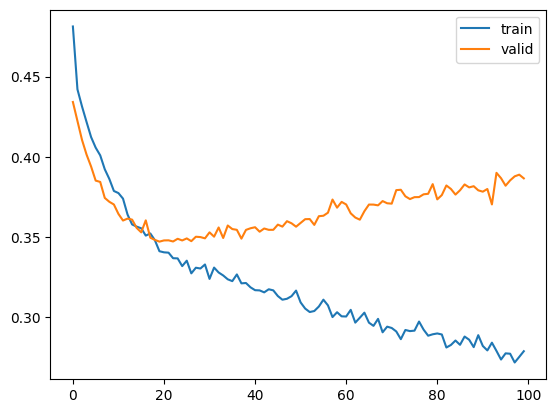

In [ ]:
# Capturing learning history per epoch
hist2  = pd.DataFrame(history2.history)
hist2['epoch'] = history2.epoch

# Plotting accuracy at different epochs
plt.plot(hist2['loss'])
plt.plot(hist2['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model2.evaluate(X_test, y_test)
results

94/94 [==============================] - 0s 1ms/step
Best Threshold=0.228699, G-Mean=0.762


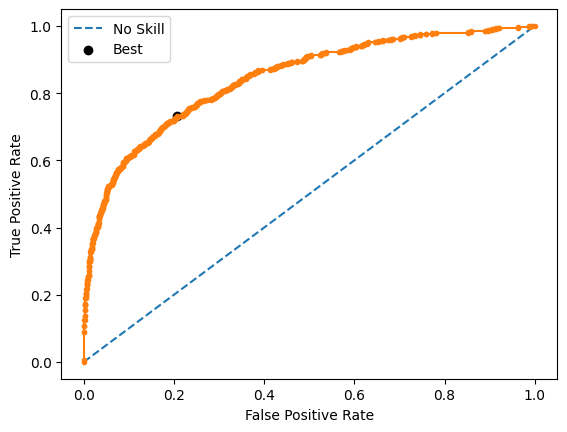

In [ ]:
# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr2, tpr2, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr2 * (1-fpr2))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr2, tpr2, marker='.')
plt.scatter(fpr2[ix], tpr2[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_pred2=model2.predict(X_test)
y_pred2 = (y_pred2 > thresholds2[ix])
y_pred2

94/94 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

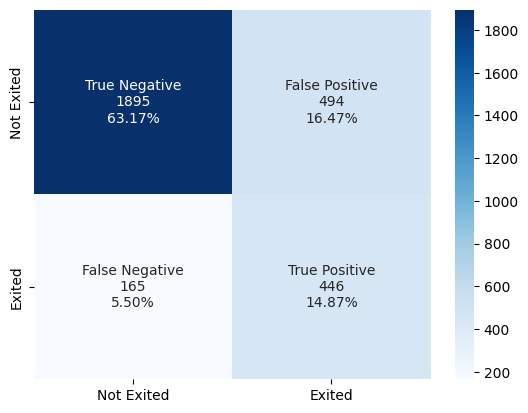

In [ ]:
#Calculating the confusion matrix 
cm2=confusion_matrix(y_test, y_pred2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Not Exited','Exited']
make_confusion_matrix(cm2, 
                     group_names=labels,
                     categories=categories, 
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report 
cr2=classification_report(y_test,y_pred2)
print(cr2)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      2389
           1       0.47      0.73      0.58       611

    accuracy                           0.78      3000
   macro avg       0.70      0.76      0.71      3000
weighted avg       0.83      0.78      0.80      3000



**Model 3**
* 4 Hidden Layer, Activation - relu
* Adding Dropout
* Optimizer - Adam with learning rate
* loss = binary_crossentropy
* epochs - 100
* batch_size - 100
* early stopping
* weight initialization

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
model3 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model3.add(Dense(128,activation = 'relu', kernel_initializer='he_normal',input_dim = 11))
model3.add(Dropout(.3))
model3.add(Dense(64,kernel_initializer='he_normal', activation='relu'))
model3.add(Dropout(.3))
model3.add(Dense(32, kernel_initializer='he_normal',activation='relu'))
# We use the sigmoid because we want probability outcomes
model3.add(Dense(1, kernel_initializer='he_normal',activation = 'sigmoid')) 

In [ ]:
# Compile the model

model3.compile(optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15, 
                              verbose=0, mode='min', restore_best_weights= True)

history3=model3.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=100,callbacks=[es],shuffle=True,
          batch_size=100,verbose=1)

Epoch 1/100
56/56 [==============================] - 1s 7ms/step - loss: 0.5257 - accuracy: 0.7763 - val_loss: 0.4501 - val_accuracy: 0.7936
Epoch 2/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4686 - accuracy: 0.7932 - val_loss: 0.4380 - val_accuracy: 0.8029
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4632 - accuracy: 0.7986 - val_loss: 0.4333 - val_accuracy: 0.8057
Epoch 4/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4498 - accuracy: 0.8029 - val_loss: 0.4306 - val_accuracy: 0.8071
Epoch 5/100
56/56 [==============================] - 0s 4ms/step - loss: 0.4495 - accuracy: 0.8048 - val_loss: 0.4308 - val_accuracy: 0.8164
Epoch 6/100
56/56 [==============================] - 0s 4ms/step - loss: 0.4379 - accuracy: 0.8057 - val_loss: 0.4219 - val_accuracy: 0.8171
Epoch 7/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4397 - accuracy: 0.8098 - val_loss: 0.4213 - val_accuracy: 0.8193
Epoch 8/100
5

94/94 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 0.8607


[0.3406699001789093, 0.8606666922569275]

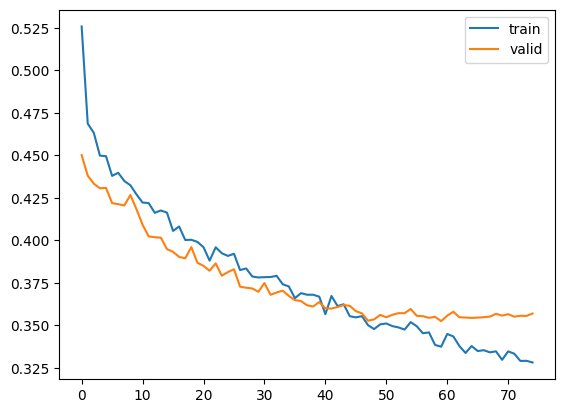

In [ ]:
# Capturing learning history per epoch
hist3  = pd.DataFrame(history3.history)
hist3['epoch'] = history3.epoch

# Plotting accuracy at different epochs
plt.plot(hist3['loss'])
plt.plot(hist3['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model3.evaluate(X_test, y_test)
results

94/94 [==============================] - 0s 2ms/step
Best Threshold=0.206006, G-Mean=0.786


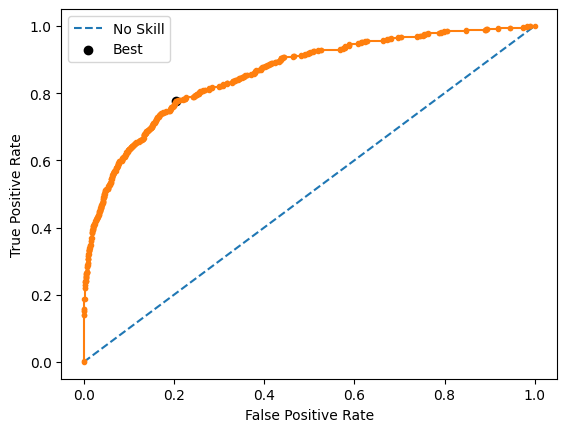

In [ ]:
# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr3, tpr3, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr3 * (1-fpr3))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr3, tpr3, marker='.')
plt.scatter(fpr3[ix], tpr3[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_pred3 = model3.predict(X_test)
y_pred3 = (y_pred3 > thresholds3[ix])
y_pred3

94/94 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

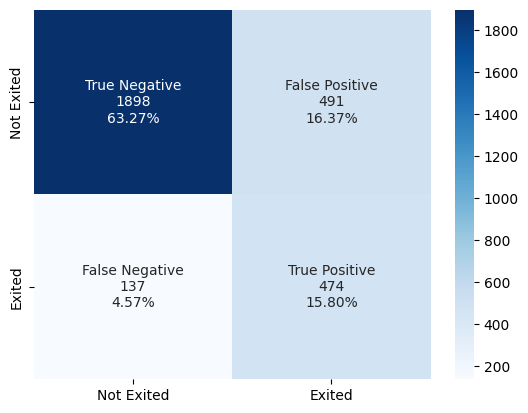

In [ ]:
#Calculating the confusion matrix 
cm3=confusion_matrix(y_test, y_pred3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Not Exited','Exited']
make_confusion_matrix(cm3, 
                     group_names=labels,
                     categories=categories, 
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report 
cr3=classification_report(y_test,y_pred3)
print(cr3)

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      2389
           1       0.49      0.78      0.60       611

    accuracy                           0.79      3000
   macro avg       0.71      0.79      0.73      3000
weighted avg       0.84      0.79      0.81      3000



Based on the available features and different hyperparameter tuning, Model 3 is giving best result of recall 0.78 for class 1. Model 1 and Model 2 was executed for 100 epochs which seems too high. 

**Conclusion and Recommendation**
* Bank should use the model 3 to identify customers who are likely to exit and offer them different incentives to avoid customer churn
* From the EDA we have seen, Customers with credit score less than 400 are likely to exit so for those customers, bank can offer them specific plans
* Customers with credit cards are less likely to leave the bank, so bank can offer appropriate credit cards to its customers
* Bank should also have special plans for Germany customers
* Active customers are less likely to leave, so Banks should engage with customers who are not so active to avoid churn
* Bank should also offer appropriate products to its female customers